# Import data

In [24]:
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import normalize, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
#import smogn


data_df = pd.read_csv('../data/old.csv')
pred_df = pd.read_csv('../data/crash_amounts.csv')

labels = list(data_df)[3:]
print(labels)

new_data_df = []

X = []
for index, row in pred_df.iterrows():
    relevant_x = data_df.loc[data_df["GISJOIN"] == row["GISJOIN"]]
    new_data_df.append([*relevant_x.values.flatten().tolist(),row['crash_amount']])
    X.append(relevant_x[labels].to_numpy().reshape(-1))
    

    
X = np.array(X)
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X)
X = min_max_scaler.transform(X)
T = pred_df[["crash_amount"]].to_numpy()

new_data_df = pd.DataFrame(new_data_df, columns=[*list(data_df), 'crash_amount'])

['bachelors_degree', 'gini_index', 'median_household_income', 'median_age', 'white', 'black', 'native_american', 'asian', 'poverty', 'owned', 'occupied', 'avg_annual_pay', 'oty_annual_avg_estabs_pct_chg', 'oty_annual_avg_emplvl_pct_chg', 'oty_total_annual_wages_pct_chg', 'oty_taxable_annual_wages_pct_chg', 'oty_annual_contributions_pct_chg', 'oty_annual_avg_wkly_wage_pct_chg', 'oty_avg_annual_pay_pct_chg']


In [25]:
data_df

,GISJOIN,county_name,total,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,...,owned,occupied,avg_annual_pay,oty_annual_avg_estabs_pct_chg,oty_annual_avg_emplvl_pct_chg,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_pct_chg
0,G4800630,Camp County,12489,0.1550012725884449,0.448,44736.12,36.5,0.7938986307950997,0.16718712466970934,0.0023220433981904075,...,0.6458616010854816,0.8122703894195444,6866.301094890511,11.716240875912407,0.7213503649635036,1.113321167883212,-0.02427007299270081,-2.7644160583941595,0.49562043795620464,0.49689781021897794
1,G4801470,Fannin County,32884,0.1341053748231966,0.414,55998.36,39.9,0.8754409439240968,0.07511251672545918,0.0063860844179540206,...,0.7293723554301833,0.8324038743762842,7599.346381969158,16.209134045077114,-0.5359430604982202,1.4930011862396197,1.9160142348754459,0.6404507710557529,1.728469750889681,1.7256227758007134
2,G2201210,West Baton Rouge Parish,22323,0.16908346631513219,0.428,61360.200000000004,35.2,0.610088249787215,0.3493258074631546,0.001478295927966671,...,0.7425845021844102,0.9211055808535423,9369.228473019517,6.441791044776122,0.9362801377726744,2.21825487944891,0.8267508610792187,0.91894374282434,1.0195177956371988,1.021125143513203
3,G2600050,Allegan County,112817,0.19706893285339253,0.397,68419.56,37.7,0.9215011921962115,0.013322460267512874,0.004458547913878228,...,0.8355387072932313,0.8671104587459428,12128.511940298507,4.119776119402983,0.618134328358208,2.0975373134328335,0.852910447761194,2.5017910447761182,1.556492537313432,1.560597014925373
4,G5500890,Ozaukee County,85554,0.4220551553315076,0.448,97992.84000000001,42.3,0.9559225752156533,0.013734015943147018,0.0014844425742805713,...,0.7865398900609122,0.9451527746573803,15975.303052866717,5.643782576321666,1.0655994043186892,2.1597170513775112,1.2202531645569616,0.6797468354430368,1.0529411764705887,1.054728220402084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,G0800530,Hinsdale County,554,0.2066326530612245,0.414,70950,34.2,0.9494584837545126,0,0.036101083032490974,...,0.6666666666666666,0.12745098039215685,4325.923076923077,8.381623931623931,-0.4871794871794872,0.2658119658119658,0.666666666666667,-1.2623931623931628,1.6141025641025635,1.6029914529914524
3412,G4200150,Bradford County,61375,0.15578187688436246,0.42,51799.44,42.4,0.9750386965376782,0.0057841140529531565,0.0024928716904276988,...,0.7450268329096558,0.8410996097064314,9046.103574702109,7.542163153070586,1.1168652612282308,3.6206232813932195,0.7186067827681026,-0.3649862511457384,1.160219981668193,1.1621448212648933
3413,G3900390,Defiance County,38516,0.15081723625557206,0.398,59504.280000000006,39,0.9388825423200747,0.015526015162529858,0.004855125142797798,...,0.7865395913571382,0.9070400852625969,10278.242331288344,7.270961145194272,0.6972392638036808,2.4072597137014324,1.621676891615543,1.7088957055214729,1.1328220858895717,1.1303680981595094
3414,G5500410,Forest County,9764,0.11020589542290031,0.432,48081,43.6,0.8383859074149939,0.016591560835723065,0.11675542810323637,...,0.7441914498141264,0.48408502980542123,6204.43736730361,1.8004246284501062,-0.11847133757961764,0.23545647558386423,0.17133757961783433,0.5036093418259017,0.5055201698513796,0.4989384288747341


In [26]:
pred_df.sort_values(by='crash_amount', ascending=False)

,Unnamed: 0,county,GISJOIN,highest_price,lowest_price,crash_amount
229,229,Merced County,G0600470,373376.0,111317.0,0.701864
14,14,Wayne County,G2601630,157238.0,48176.0,0.693611
118,118,Stanislaus County,G0600990,425152.0,140078.0,0.670523
228,228,Clayton County,G1300630,130244.0,45161.0,0.653258
80,80,San Joaquin County,G0600770,460671.0,162641.0,0.646948
...,...,...,...,...,...,...
343,343,Ouachita Parish,G2200730,123592.0,119586.0,0.032413
661,661,Holmes County,G3900750,138185.0,133889.0,0.031089
671,671,Tioga County,G4201170,108619.0,105557.0,0.028190
871,871,Saunders County,G3101550,148062.0,145762.0,0.015534


In [27]:
X.shape, T.shape

((1066, 19), (1066, 1))

In [28]:
X_train, X_test, T_train, T_test = train_test_split(X,T,test_size=0.3)
X_train.shape, X_test.shape, T_train.shape, T_test.shape

((746, 19), (320, 19), (746, 1), (320, 1))

# Correlations

In [29]:
corr_thing = pd.DataFrame(list(np.hstack((T.reshape(-1,1),X))), columns=["target",*labels])
corr_thing.corr()

,target,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied,avg_annual_pay,oty_annual_avg_estabs_pct_chg,oty_annual_avg_emplvl_pct_chg,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_pct_chg
target,1.000000,0.102033,0.011995,0.204317,-0.050589,-0.211397,0.064692,0.020948,0.216522,-0.104923,-0.069584,-0.030849,0.315393,0.258652,0.226192,0.019612,0.161088,0.034840,0.136636,0.137004
bachelors_degree,0.102033,1.000000,0.122554,0.765688,-0.192640,-0.015036,-0.129906,-0.090011,0.499943,-0.560311,-0.213299,0.259046,0.734697,0.180920,0.350610,-0.027709,0.323984,0.029450,0.332476,0.333453
gini_index,0.011995,0.122554,1.000000,-0.339850,-0.048695,-0.399567,0.387136,-0.006722,0.068336,0.524108,-0.500854,-0.176396,0.230965,-0.039679,0.068833,-0.049542,0.061314,0.033912,0.109845,0.110247
median_household_income,0.204317,0.765688,-0.339850,1.000000,-0.106038,0.119860,-0.275016,-0.105108,0.487920,-0.823738,0.157731,0.366485,0.594860,0.227542,0.305074,0.019408,0.284913,0.052690,0.238399,0.239099
median_age,-0.050589,-0.192640,-0.048695,-0.106038,1.000000,0.363078,-0.213022,-0.037575,-0.229219,-0.154721,0.518069,-0.435612,-0.251313,-0.137195,-0.204404,-0.013681,-0.170968,-0.037600,-0.172279,-0.172526
white,-0.211397,-0.015036,-0.399567,0.119860,0.363078,1.000000,-0.866700,-0.113131,-0.312414,-0.416659,0.533854,-0.026406,-0.210107,-0.061287,-0.137719,-0.020908,-0.112502,-0.033815,-0.057409,-0.057666
black,0.064692,-0.129906,0.387136,-0.275016,-0.213022,-0.866700,1.000000,-0.123173,-0.047877,0.476322,-0.363955,-0.045915,-0.008918,-0.073566,-0.045334,0.027787,-0.039552,0.015284,-0.081731,-0.081808
native_american,0.020948,-0.090011,-0.006722,-0.105108,-0.037575,-0.113131,-0.123173,1.000000,-0.027763,0.119649,-0.009947,-0.120978,-0.089292,0.084328,0.040492,-0.005250,0.005013,0.014881,0.037928,0.037887
asian,0.216522,0.499943,0.068336,0.487920,-0.229219,-0.312414,-0.047877,-0.027763,1.000000,-0.264372,-0.339130,0.236704,0.589766,0.194349,0.378897,-0.001161,0.346116,0.052261,0.283112,0.283805
poverty,-0.104923,-0.560311,0.524108,-0.823738,-0.154721,-0.416659,0.476322,0.119649,-0.264372,1.000000,-0.361877,-0.264666,-0.395042,-0.151626,-0.190335,-0.016968,-0.190044,-0.029170,-0.168423,-0.168904


# Linear Regression

In [30]:
linreg = LinearRegression()
linreg.fit(X_train,T_train)
linreg.score(X_train,T_train)

0.3108708863415979

In [31]:
Y_train = linreg.predict(X_train)
rmse_train = np.sqrt(np.mean((Y_train-T_train)**2))
print(f"Train RMSE: {rmse_train}")

Y_test = linreg.predict(X_test)
rmse_test = np.sqrt(np.mean((Y_test-T_test)**2))
print(f"Test RMSE: {rmse_test}")

Train RMSE: 0.10582209564781768
Test RMSE: 0.10716282960510225


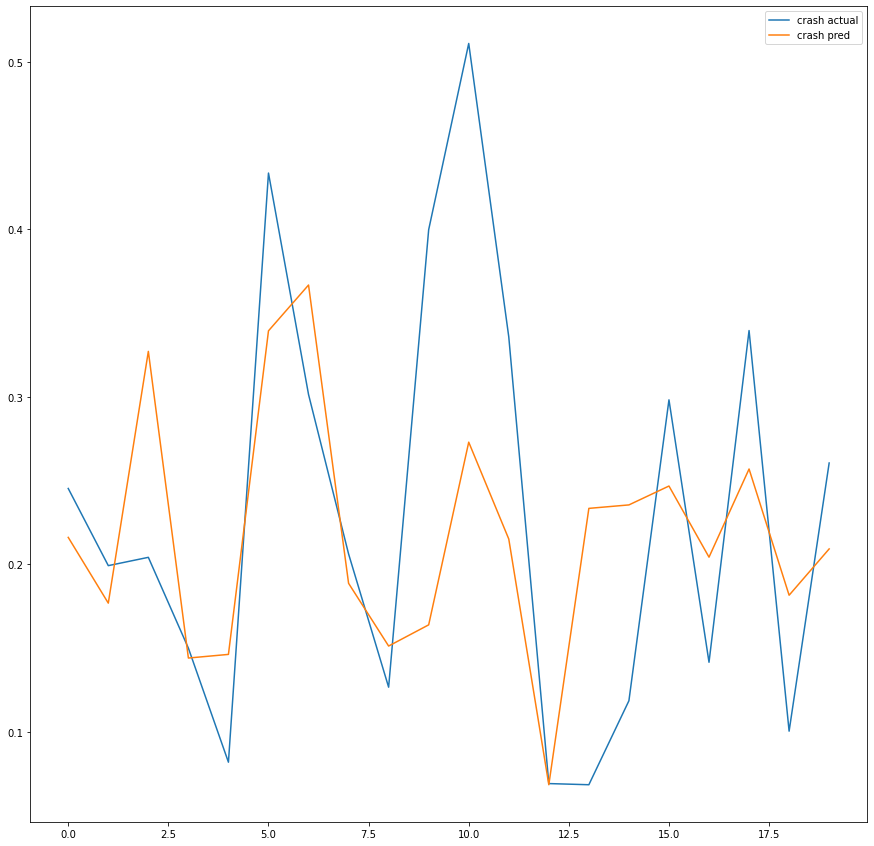

In [32]:
plt.figure(figsize=(15,15))
plt.plot(T_test[:20], label="crash actual")
plt.plot(Y_test[:20], label="crash pred")
plt.legend()

Its really bad at extreme values.

In [33]:
pd.DataFrame(linreg.coef_, columns=labels)

,bachelors_degree,gini_index,median_household_income,median_age,white,black,native_american,asian,poverty,owned,occupied,avg_annual_pay,oty_annual_avg_estabs_pct_chg,oty_annual_avg_emplvl_pct_chg,oty_total_annual_wages_pct_chg,oty_taxable_annual_wages_pct_chg,oty_annual_contributions_pct_chg,oty_annual_avg_wkly_wage_pct_chg,oty_avg_annual_pay_pct_chg
0,-0.307443,-0.01079,0.261103,0.04031,-0.496603,-0.376633,-0.310664,-0.430261,0.004887,0.047844,-0.175649,0.372944,0.21109,0.154101,-0.003744,-0.109034,-0.010848,3.106178,-3.071489


In [34]:
linreg.intercept_

array([0.62373266])

# Get predictions for 2020

In [35]:
to_predict_df = pd.read_csv('../data/now.csv')
to_predict_df = to_predict_df.loc[to_predict_df['GISJOIN'] != 'GISJOIN',:]

X_to_predict = to_predict_df[labels].values.astype(np.float32)
print(X_to_predict.shape)
min_max_scaler_pred = MinMaxScaler()
min_max_scaler_pred.fit(X_to_predict)
X_to_predict = min_max_scaler.transform(X_to_predict)

results = linreg.predict(X_to_predict)

# now write results

to_predict_df["crash_amount"] =  results 

to_predict_df

import json

with open('../frontend/data.json') as f:
    shape_data = json.load(f)
    
to_write = []

old_features = shape_data['features'] if not isinstance(shape_data, list) else shape_data

for old_feature in old_features:
    gisjoin = old_feature['properties']['GISJOIN']
    result = to_predict_df.loc[to_predict_df['GISJOIN'] == gisjoin].T.to_dict()
    if not len(list(result.keys())):
        continue
    result = result[list(result.keys())[0]]
    old_feature['properties'] = {**old_feature['properties'], **result}
    to_write.append(old_feature)

with open('../frontend/data.json', 'w') as jsonfile:
    json.dump(to_write, jsonfile)

(3219, 19)


# Where got worse?

In [53]:
sig = []
for index, pred_2007_row in new_data_df.iterrows():
    gisjoin = pred_2007_row['GISJOIN']
    crash_amount_old = pred_2007_row['crash_amount']
    pred_2020_row = to_predict_df.loc[to_predict_df['GISJOIN'] == gisjoin]
    if not len(list(pred_2020_row.keys())):
        continue
    crash_amount_new = pred_2020_row['crash_amount'].values[0]
    difference = crash_amount_new - crash_amount_old
    
    if difference > 0.2:
        siga = [pred_2007_row['GISJOIN'], pred_2007_row['county_name'], crash_amount_old, crash_amount_new]
        sig.append(siga)

more_risk_df = pd.DataFrame(sig, columns=["GISJOIN", "County Name", "Old Crash Amount", "New Crash Amount"])
more_risk_df

,GISJOIN,County Name,Old Crash Amount,New Crash Amount
0,G4802010,Harris County,0.119461,0.431237
1,G4801130,Dallas County,0.162000,0.410050
2,G4804390,Tarrant County,0.115052,0.344008
3,G3600610,New York County,0.160166,0.439023
4,G4804530,Travis County,0.085999,0.304695
5,G1500030,Honolulu County,0.153312,0.413420
6,G4800850,Collin County,0.071636,0.283322
7,G2500250,Suffolk County,0.183516,0.400057
8,G4801210,Denton County,0.062632,0.277194
9,G1100010,District of Columbia,0.110384,0.411350


# Deep Learning

Let's just try deep learning for fun.

In [54]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

2022-04-27 11:30:49.046975: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [56]:
model = keras.Sequential(
    [
        layers.Dense(64, activation="relu", name="layer1"),
        layers.Dense(256, activation="relu", name="layer2"),
        layers.Dense(64, activation="relu", name="layer3"),
        layers.Dense(1, name='out', activation='sigmoid')
    ]
)
#model.summary()
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)

In [57]:
n_epochs = 250
history1 = model.fit(X_train, T_train, batch_size=16, epochs=n_epochs, verbose=1, validation_data=(X_test,T_test))

2022-04-27 11:31:39.673849: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-27 11:31:39.708621: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2593770000 Hz


Epoch 1/250
47/47 [==============================] - 1s 7ms/step - loss: 0.0240 - val_loss: 0.0155
Epoch 2/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0137 - val_loss: 0.0118
Epoch 3/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0114 - val_loss: 0.0115
Epoch 4/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.0126
Epoch 5/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0099 - val_loss: 0.0123
Epoch 6/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0146
Epoch 7/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.0114
Epoch 8/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0101 - val_loss: 0.0110
Epoch 9/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0100 - val_loss: 0.0110
Epoch 10/250
47/47 [==============================] - 0s 2ms/step - loss: 0.0098 - val_loss: 0.0110
Epoch 11/

In [58]:
Y_train = model.predict(X_train)
Y_test = model.predict(X_test)

In [59]:
Y_train = linreg.predict(X_train)
rmse_train = np.sqrt(np.mean((Y_train-T_train)**2))
print(f"Train RMSE: {rmse_train}")

Y_test = linreg.predict(X_test)
rmse_test = np.sqrt(np.mean((Y_test-T_test)**2))
print(f"Test RMSE: {rmse_test}")

Train RMSE: 0.10577884336132523
Test RMSE: 0.10856791460266536


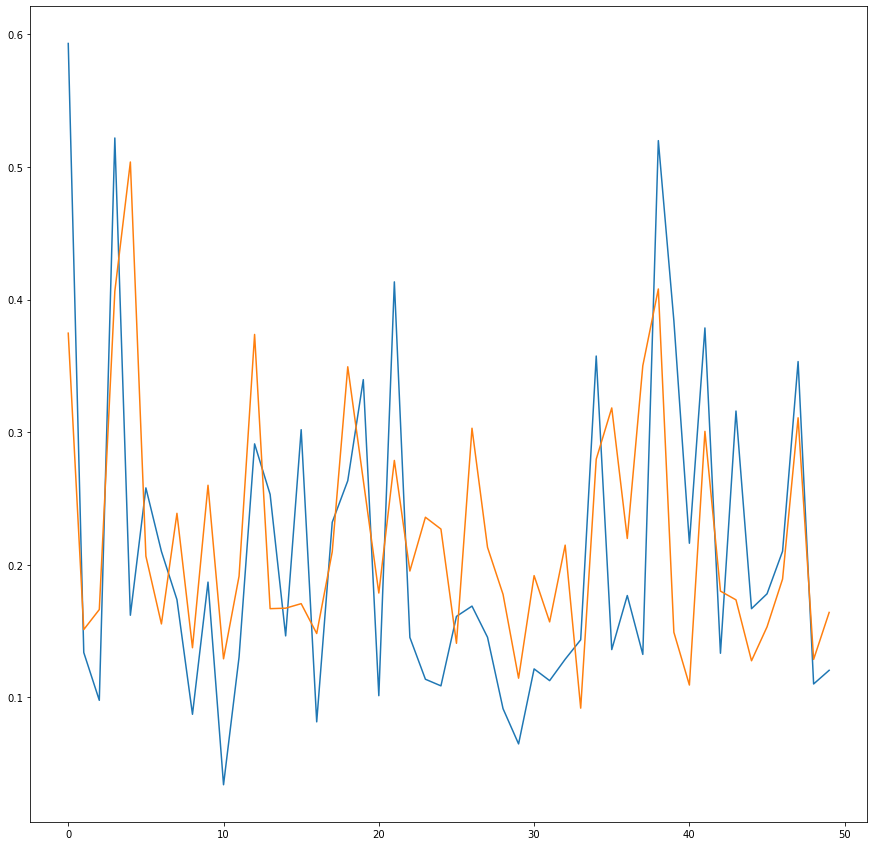

In [9]:
plt.figure(figsize=(15,15))

num_ex = 50
plt.plot(T_test[:num_ex])
plt.plot(Y_test[:num_ex]);

In [10]:
Y_test.mean()

0.2201644299945631

MAJORLY INCONCLUSIVE RESULTS

# Comparison with Han Paper

In [50]:
res_scores_df = pd.read_csv('../data/resilience_data.csv')
res_scores_df.dropna(subset=['resilience'], inplace=True)

In [52]:
res_scores_df

,serial,fips,county name,drop,rebound,resilience,note,GISJOIN
12,13,48225,"Houston, TX",-0.329331,0.034863,9.574557,NaN,G4802250
13,14,29129,"Mercer, MO",0.693450,2.199313,4.135589,NaN,G2901290
14,15,47099,"Lawrence, TN",-0.229076,0.089576,3.196039,NaN,G4700990
15,16,6003,"Alpine, CA",0.492448,0.579602,2.944104,NaN,G6000030
16,17,48033,"Borden, TX",0.090997,0.260870,2.807313,NaN,G4800330
...,...,...,...,...,...,...,...,...
2843,2844,40115,"Ottawa, OK",0.255267,0.000527,-4.158418,NaN,G4001150
2844,2845,42111,"Somerset, PA",0.162485,0.000414,-4.226835,NaN,G4201110
2845,2846,5137,"Stone, AR",0.377136,0.000411,-4.621758,NaN,G5100370
2846,2847,34015,"Gloucester, NJ",0.226790,0.000157,-5.354264,NaN,G3400150


In [51]:
# GISJOIN key generation
res_scores_df['GISJOIN'] = 'G' + res_scores_df['fips'].astype(str).str.slice(0,2).str.zfill(2) \
                              + res_scores_df['fips'].astype(str).str.slice(2,5).str.zfill(4) + '0'


In [53]:
res_scores_df[['GISJOIN', 'county name', 'resilience']]

,GISJOIN,county name,resilience
12,G4802250,"Houston, TX",9.574557
13,G2901290,"Mercer, MO",4.135589
14,G4700990,"Lawrence, TN",3.196039
15,G6000030,"Alpine, CA",2.944104
16,G4800330,"Borden, TX",2.807313
...,...,...,...
2843,G4001150,"Ottawa, OK",-4.158418
2844,G4201110,"Somerset, PA",-4.226835
2845,G5100370,"Stone, AR",-4.621758
2846,G3400150,"Gloucester, NJ",-5.354264


In [54]:
to_predict_df[['GISJOIN', 'county_name', 'crash_amount']]

,GISJOIN,county_name,crash_amount
0,G3600670,Onondaga County,0.168897
1,G2801170,Prentiss County,0.110678
2,G2801350,Tallahatchie County,0.208598
3,G2900890,Howard County,0.051614
4,G2600050,Allegan County,0.187569
...,...,...,...
3413,G2900650,Dent County,0.078598
3414,G2902010,Scott County,0.099066
3415,G1700810,Jefferson County,0.106939
3416,G3600750,Oswego County,0.128781


In [57]:
joined_df = res_scores_df.merge(to_predict_df, on='GISJOIN', how='inner')

In [82]:
relevant_cols_df = joined_df.loc[:, ['GISJOIN', 'county name', 'resilience', 'crash_amount']]
relevant_cols_df = relevant_cols_df.loc[(relevant_cols_df['crash_amount'] > 0) & (relevant_cols_df['crash_amount'] < 1),:]
relevant_cols_df['our_resilience'] = 1 - relevant_cols_df['crash_amount']
relevant_cols_df

,GISJOIN,county name,resilience,crash_amount,our_resilience
0,G4802250,"Houston, TX",9.574557,0.246585,0.753415
1,G2901290,"Mercer, MO",4.135589,0.140599,0.859401
2,G4700990,"Lawrence, TN",3.196039,0.120487,0.879513
3,G4800330,"Borden, TX",2.807313,0.078967,0.921033
4,G1301010,"Echols, GA",2.702036,0.157509,0.842491
...,...,...,...,...,...
2596,G4200950,"Northampton, PA",-4.119424,0.193098,0.806902
2597,G4001150,"Ottawa, OK",-4.158418,0.105565,0.894435
2598,G4201110,"Somerset, PA",-4.226835,0.165526,0.834474
2599,G3400150,"Gloucester, NJ",-5.354264,0.213919,0.786081


In [77]:
for col in ['resilience', 'crash_amount', 'our_resilience']:
    column = relevant_cols_df[col]
    relevant_cols_df[f'normalized_{col}'] = (column-column.min())/(column.max()-column.min())

In [81]:
relevant_cols_df.corr()

,resilience,crash_amount,our_resilience,normalized_resilience,normalized_crash_amount,normalized_our_resilience
resilience,1.00000,-0.10931,0.10931,1.00000,-0.10931,0.10931
crash_amount,-0.10931,1.00000,-1.00000,-0.10931,1.00000,-1.00000
our_resilience,0.10931,-1.00000,1.00000,0.10931,-1.00000,1.00000
normalized_resilience,1.00000,-0.10931,0.10931,1.00000,-0.10931,0.10931
normalized_crash_amount,-0.10931,1.00000,-1.00000,-0.10931,1.00000,-1.00000
normalized_our_resilience,0.10931,-1.00000,1.00000,0.10931,-1.00000,1.00000
